<a href="https://colab.research.google.com/github/Captaingreenbeard/DataAnalyticsLab_SEM7/blob/main/DA_Lab4_climateChange.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv("climate_change.csv")

In [3]:
data.head()

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
0,1983,5,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863,0.109
1,1983,6,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794,0.118
2,1983,7,1.741,344.15,1633.22,303.795,192.818,353.725,1366.2850,0.0731,0.137
3,1983,8,1.130,342.25,1631.35,303.839,193.602,355.633,1366.4202,0.0673,0.176
4,1983,9,0.428,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619,0.149


In [4]:
data.tail()

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
303,2008,8,-0.266,384.15,1779.88,321.405,244.200,535.072,1365.6570,0.0036,0.407
304,2008,9,-0.643,383.09,1795.08,321.529,244.083,535.048,1365.6647,0.0043,0.378
305,2008,10,-0.780,382.99,1814.18,321.796,244.080,534.927,1365.6759,0.0046,0.440
306,2008,11,-0.621,384.13,1812.37,322.013,244.225,534.906,1365.7065,0.0048,0.394
307,2008,12,-0.666,385.56,1812.88,322.182,244.204,535.005,1365.6926,0.0046,0.330


In [5]:
data.shape
#rows, columns

(308, 11)

In [6]:
data.describe()

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
count,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000
mean,1995.662338,6.551948,0.275555,363.226753,1749.824513,312.391834,251.973068,497.524782,1366.070759,0.016657,0.256776
std,7.423197,3.447214,0.937918,12.647125,46.051678,5.225131,20.231783,57.826899,0.399610,0.029050,0.179090
min,1983.000000,1.000000,-1.635000,340.170000,1629.890000,303.677000,191.324000,350.113000,1365.426100,0.001600,-0.282000
25%,1989.000000,4.000000,-0.398750,353.020000,1722.182500,308.111500,246.295500,472.410750,1365.717050,0.002800,0.121750
50%,1996.000000,7.000000,0.237500,361.735000,1764.040000,311.507000,258.344000,528.356000,1365.980900,0.005750,0.248000
75%,2002.000000,10.000000,0.830500,373.455000,1786.885000,316.979000,267.031000,540.524250,1366.363250,0.012600,0.407250
max,2008.000000,12.000000,3.001000,388.500000,1814.180000,322.182000,271.494000,543.813000,1367.316200,0.149400,0.739000


In [7]:
# trying to understand the features
data.columns

Index(['Year', 'Month', 'MEI', 'CO2', 'CH4', 'N2O', 'CFC-11', 'CFC-12', 'TSI',
       'Aerosols', 'Temp'],
      dtype='object')

In [8]:
data.nunique()
#number of unique values for each attribute

Year         26
Month        12
MEI         294
CO2         298
CH4         303
N2O         304
CFC-11      307
CFC-12      307
TSI         302
Aerosols    155
Temp        242
dtype: int64

In [9]:
# lets see as to how clean is the dataset
data.isnull().sum()

Year        0
Month       0
MEI         0
CO2         0
CH4         0
N2O         0
CFC-11      0
CFC-12      0
TSI         0
Aerosols    0
Temp        0
dtype: int64

In [10]:
# therefore we have no value which has any null value
# the dataset is already clean; therfore no need of any cleaning

In [11]:
# now that the dataset is cleaned; lets ttry to figure out a relationship between the atributes

In [12]:
correl = data.corr()

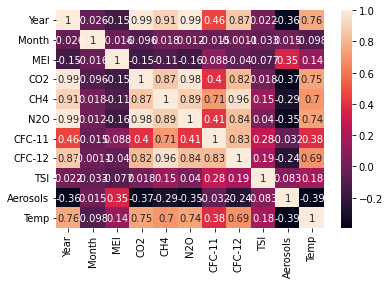

In [13]:
sns.heatmap(correl,xticklabels=correl.columns, yticklabels=correl.columns, annot=True)

PART 1

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [15]:
data.columns

Index(['Year', 'Month', 'MEI', 'CO2', 'CH4', 'N2O', 'CFC-11', 'CFC-12', 'TSI',
       'Aerosols', 'Temp'],
      dtype='object')

In [16]:
#Extracting independent and dependent Variable  
x= data.iloc[:, [0,1,2,3,4,5,6,7,8,9]].values  
y= data.iloc[:, 10].values  

In [17]:
print(x)

[[ 1.9830000e+03  5.0000000e+00  2.5560000e+00 ...  3.5011300e+02
   1.3661024e+03  8.6300000e-02]
 [ 1.9830000e+03  6.0000000e+00  2.1670000e+00 ...  3.5184800e+02
   1.3661208e+03  7.9400000e-02]
 [ 1.9830000e+03  7.0000000e+00  1.7410000e+00 ...  3.5372500e+02
   1.3662850e+03  7.3100000e-02]
 ...
 [ 2.0080000e+03  1.0000000e+01 -7.8000000e-01 ...  5.3492700e+02
   1.3656759e+03  4.6000000e-03]
 [ 2.0080000e+03  1.1000000e+01 -6.2100000e-01 ...  5.3490600e+02
   1.3657065e+03  4.8000000e-03]
 [ 2.0080000e+03  1.2000000e+01 -6.6600000e-01 ...  5.3500500e+02
   1.3656926e+03  4.6000000e-03]]


In [18]:
print(y)

[ 0.109  0.118  0.137  0.176  0.149  0.093  0.232  0.078  0.089  0.013
  0.049 -0.019  0.065 -0.016 -0.024  0.034  0.025 -0.035 -0.123 -0.282
 -0.001 -0.155 -0.032 -0.042  0.001 -0.049 -0.042  0.013 -0.035 -0.008
 -0.093 -0.002  0.121  0.065  0.049  0.045  0.023  0.055  0.004 -0.001
  0.016  0.043 -0.033  0.022  0.116  0.266  0.021  0.084  0.145  0.121
  0.238  0.219  0.25   0.174  0.186  0.314  0.334  0.189  0.248  0.224
  0.175  0.2    0.168  0.154  0.149  0.12   0.027  0.106  0.019  0.094
  0.088  0.083  0.073  0.094  0.167  0.168  0.135  0.145  0.067  0.181
  0.187  0.242  0.442  0.285  0.231  0.233  0.196  0.227  0.179  0.271
  0.278  0.199  0.224  0.272  0.161  0.299  0.249  0.269  0.271  0.225
  0.176  0.133  0.079  0.084  0.266  0.25   0.199  0.132  0.125  0.118
 -0.008 -0.007 -0.062 -0.072 -0.097  0.007  0.204  0.161  0.202  0.121
  0.158  0.122  0.088  0.06   0.013  0.061 -0.041  0.111  0.16  -0.072
  0.176  0.173  0.218  0.191  0.141  0.175  0.156  0.23   0.248  0.227
  0.34

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

In [20]:
regr = LinearRegression()
  
regr.fit(x_train, y_train)
print(regr.score(x_test, y_test))

0.6978600074211199


In [21]:
x_test.shape

(77, 10)

In [22]:
y_test.shape

(77,)

In [23]:
y_pred = regr.predict(x_test)

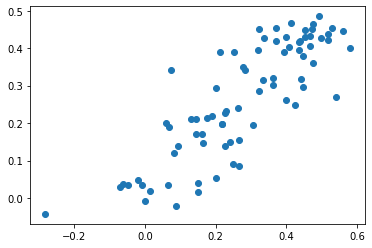

In [24]:
g=plt.scatter(y_test, y_pred)

In [25]:
data.columns

Index(['Year', 'Month', 'MEI', 'CO2', 'CH4', 'N2O', 'CFC-11', 'CFC-12', 'TSI',
       'Aerosols', 'Temp'],
      dtype='object')

In [26]:
from scipy import stats

print stats.ttest_1samp(data,5.0)

SyntaxError: ignored

Part2

In [27]:
import statsmodels.api as sm
# If p-value < 0.05 -->Significant
# If p-value > 0.05 -->Not Significant
datavar = pd.DataFrame(data, columns=['MEI','CO2', 'CH4', 'N2O', 'CFC-11','CFC-12','TSI','Aerosols'])
target=data['Temp']
X = datavar
y = target
  
X_train,X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.1, random_state = 10)
x_incl_cons = sm.add_constant(X)
model = sm.OLS(y, x_incl_cons)  #ordinary least square
results = model.fit()  #regresssion results
# results.params
# results.pvalues
pd.DataFrame({'coef': results.params , 'pvalue': round(results.pvalues,3)})

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,coef,pvalue
const,-127.695776,0.000
MEI,0.066322,0.000
CO2,0.005207,0.018
CH4,0.000064,0.898
N2O,-0.016929,0.032
CFC-11,-0.007278,0.000
CFC-12,0.004272,0.000
TSI,0.095862,0.000
Aerosols,-1.581837,0.000


PART2:
significant variables: MEI; CO2; N2O; CFC-11; CFC-12; 

PART3

Current scientific opinion is that nitrous oxide and CFC-11 are greenhouse gases: gases that 
are able to trap heat from the sun and contribute to the heating of the Earth. However, the 
regression coefficients of both the N2O and CFC-11 variables are negative, indicating that 
increasing atmospheric concentrations of either of these two compounds is associated with 
lower global temperatures.
Which of the following is the simplest correct explanation for this contradiction?

ANSWER: All of the gas concentration variables reflect human development - N2O and CFC.11 are correlated with other variables in the data set. We can see that both of them are higly correlated to the CO2 concetration of the atmospehere. Maybe, if we only take N2O or CFC11 individually, without CO2, they might recioeve positive regg. coeff.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
data.columns

In [ ]:
#Extracting independent and dependent Variable  
x= data.iloc[:, [0,1,2,3,4,5,6,7,8,9]].values  
y= data.iloc[:, 10].values  

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

In [ ]:
regr = LinearRegression()
  
regr.fit(x_train, y_train)
print(regr.score(x_test, y_test))

In [28]:
import statsmodels.api as sm
# If p-value < 0.05 -->Significant
# If p-value > 0.05 -->Not Significant
datavar = pd.DataFrame(data, columns=['MEI', 'CH4', 'N2O', 'CFC-11','CFC-12','TSI','Aerosols'])
target=data['Temp']
X = datavar
y = target
  
X_train,X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.1, random_state = 10)
x_incl_cons = sm.add_constant(X)
model = sm.OLS(y, x_incl_cons)  #ordinary least square
results = model.fit()  #regresssion results
# results.params
# results.pvalues
pd.DataFrame({'coef': results.params , 'pvalue': round(results.pvalues,3)})

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,coef,pvalue
const,-125.086848,0.000
MEI,0.066999,0.000
CH4,-0.000067,0.893
N2O,-0.004911,0.416
CFC-11,-0.007409,0.000
CFC-12,0.004433,0.000
TSI,0.092722,0.000
Aerosols,-1.643945,0.000
